In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib as plt
import seaborn as sns

In [4]:
df=pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")


In [258]:
data_states = df["STATE/UT"].unique()


#### clubbing district-wise data to state

In [259]:
state_clubbed = []
state_index = 0
state = 0

while state_index < len(df):
    state = df["STATE/UT"].loc[state_index]
    year = df['YEAR'].loc[state_index]
    dist_index = state_index
    while dist_index < len(df) and df["STATE/UT"].loc[dist_index] == state:
        dist_index += 1
    temp = df.iloc[state_index : dist_index].drop(["STATE/UT", 'DISTRICT', 'YEAR'], axis=1).sum().to_list()
    temp.insert(0,state)
    temp.insert(1,int(year))
    state_clubbed.append(temp)
    
    state_index = dist_index

In [260]:
state_df = pd.DataFrame(state_clubbed,columns=['STATE','YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING and ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'])



## Visualizing

#### Total Crimes Yearwise (2001-2012)

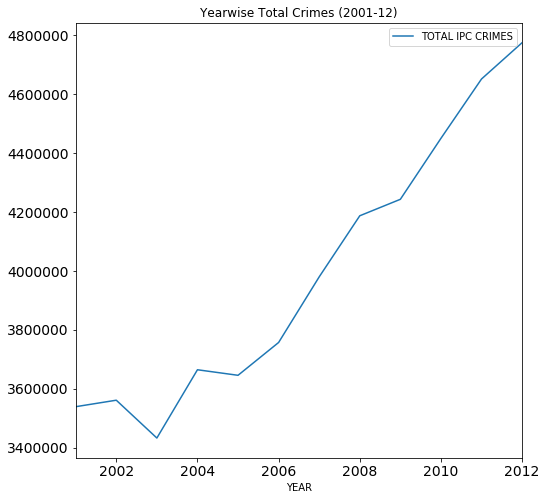

In [261]:
total_crime_yearwise = state_df.loc[:,('YEAR', 'TOTAL IPC CRIMES')]

total_crime_yearwise.groupby('YEAR').sum().plot(y='TOTAL IPC CRIMES', kind='line', fontsize=14, 
                                                 title="Yearwise Total Crimes (2001-12)", figsize=(8,8))

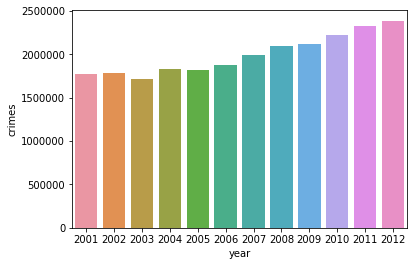

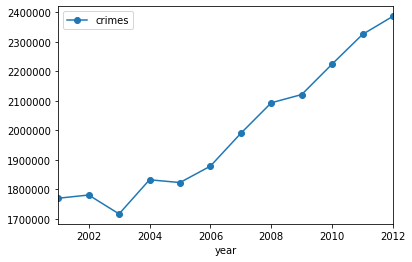

In [262]:
year=df["YEAR"].unique()
total_crimes={}
for i in year:
    df1=df[(df["YEAR"]==i) & ((df["DISTRICT"]=="TOTAL") |( df["DISTRICT"]=="DELHI UT TOTAL")) ]
    #print(df1.head(5))
    total_crime=df1["TOTAL IPC CRIMES"].sum()
    total_crimes[i]=total_crime
t1 = pd.DataFrame(list(total_crimes.items()),columns = ['year','crimes']) 
sns.barplot(x='year',y='crimes',data=t1)
t1.plot.line(x='year',y='crimes',marker='o')

#### Crime Wise Trends - 2001-12


In [263]:
headers = ['RAPE','MURDER', 'KIDNAPPING and ABDUCTION','DACOITY', 'CHEATING']

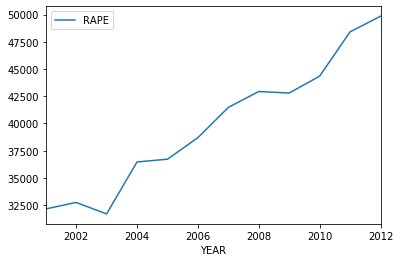

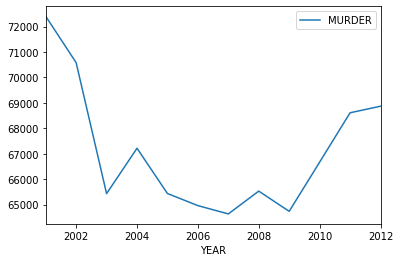

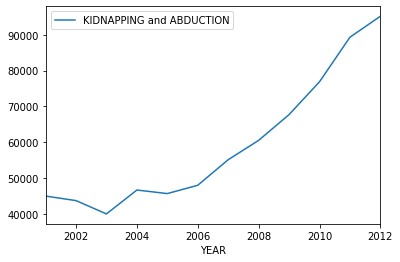

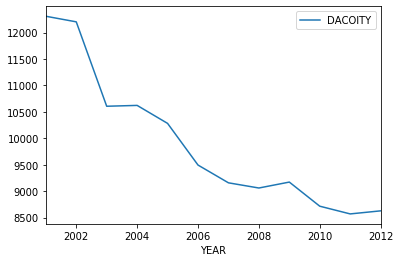

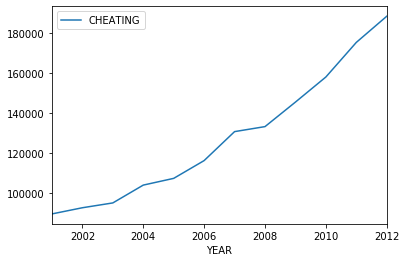

In [264]:
for crime in headers:
    crime_df = state_df.loc[:, ('STATE', 'YEAR', crime)].groupby('YEAR').sum()
    crime_df.plot()

#### Pie plot to display state wise contribution to total crimes

In [265]:
total_crimes_statewise = state_df.loc[:, ('STATE','TOTAL IPC CRIMES')].groupby('STATE').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002856CBAEC88>],
      dtype=object)

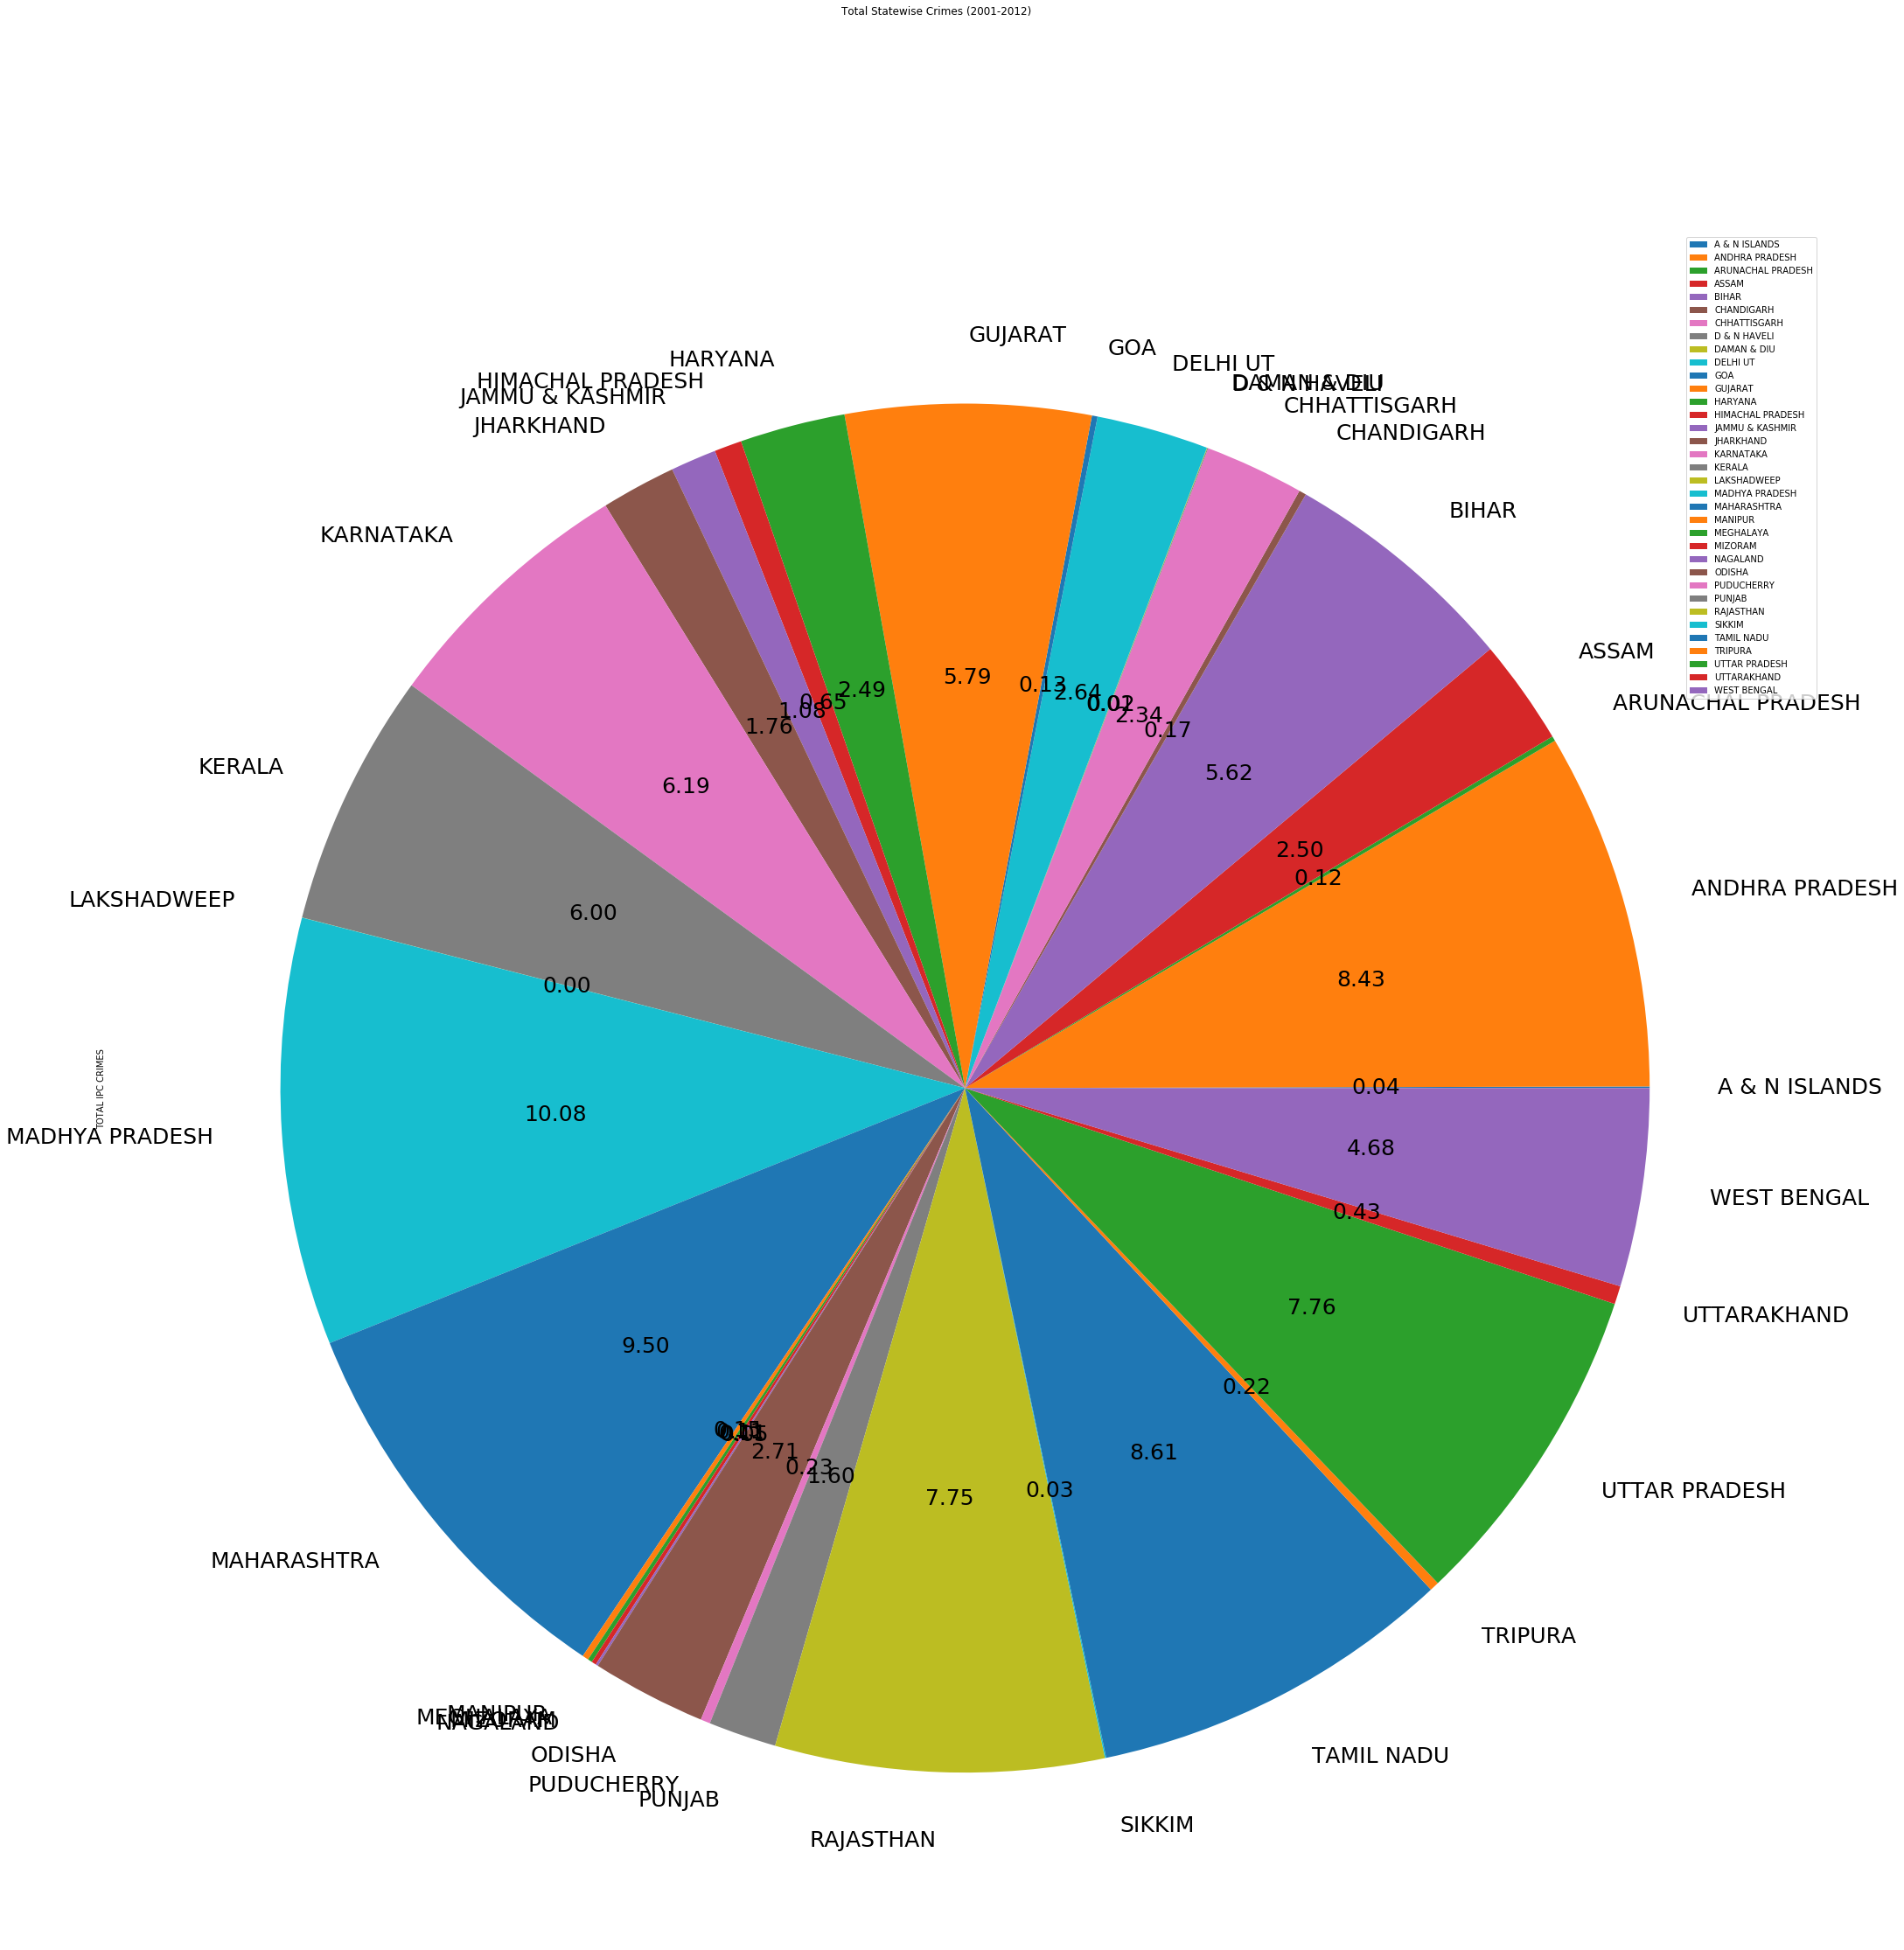

In [266]:
total_crimes_statewise.plot(subplots=True, kind='pie', title='Total Statewise Crimes (2001-2012)', 
                            fontsize=25, figsize=(36,36), autopct='%.2f')

##### Calculating top 5 states having highest number of total crimes

In [267]:
total_crimes={}
state=df["STATE/UT"].unique()
for i in state:
    df1=df[(df["STATE/UT"]==i) & (df["DISTRICT"]=="TOTAL") |( df["DISTRICT"]=="DELHI UT TOTAL")]
    #print(df1.head(5))
    total_crime=df1["TOTAL IPC CRIMES"].sum()
    total_crimes[i]=total_crime

    
sc = pd.DataFrame(list(total_crimes.items()),columns = ['STATES','crimes'])
top=sc.nlargest(5, ['crimes']) 
top


,STATES,crimes
13,MADHYA PRADESH,3046944
14,MAHARASHTRA,2906610
23,TAMIL NADU,2693350
0,ANDHRA PRADESH,2652155
25,UTTAR PRADESH,2491248


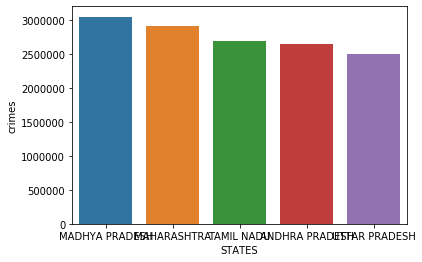

In [268]:
import seaborn as sns
sns.barplot(x='STATES',y='crimes',data=top)


### Displaying state wise trend of different crimes (2001 - 2012)

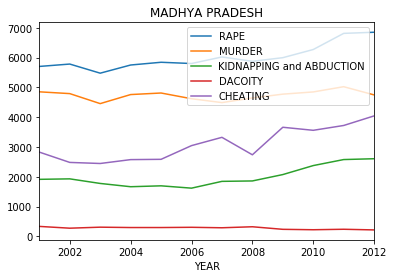

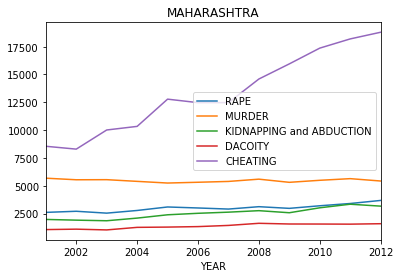

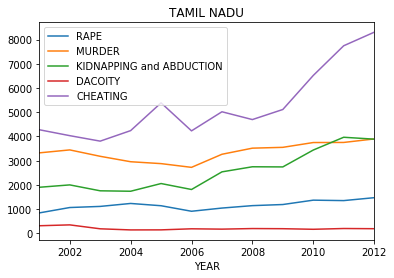

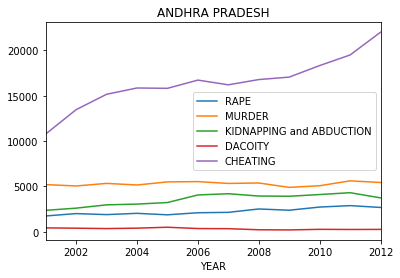

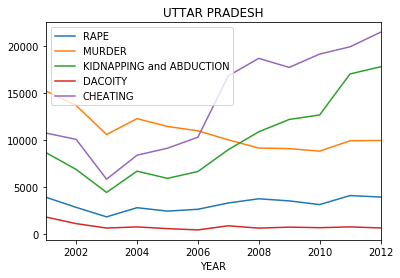

In [269]:
for state in top['STATES']:
    state_data = state_df.loc[state_df['STATE'] == state]
    crime_data=state_data.loc[:, ('RAPE','MURDER', 'KIDNAPPING and ABDUCTION','DACOITY', 'CHEATING', 'YEAR', )].groupby('YEAR').sum()
    crime_data.plot(title=state)

In [270]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING and ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [271]:
sc

,STATES,crimes
0,ANDHRA PRADESH,2652155
1,ARUNACHAL PRADESH,660826
2,ASSAM,1230938
3,BIHAR,1979467
4,CHHATTISGARH,1194201
5,GOA,665225
6,GUJARAT,2018949
7,HARYANA,1228477
8,HIMACHAL PRADESH,788122
9,JAMMU & KASHMIR,892329


In [272]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING and ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [273]:
import seaborn as sns
%matplotlib inline

year=df["YEAR"].unique()
sha=0
df2=pd.DataFrame(dtype=float,columns=df.columns)
df2.columns=df.columns
for i in year:
    df1=df[(df["YEAR"]==i) & ((df["DISTRICT"]=="TOTAL") |( df["DISTRICT"]=="DELHI UT TOTAL")) ]
    #print(df1.head(5))
    print(df1.shape)
    df2=df2.append(df1)
print(df2.shape)


(35, 33)
(35, 33)
(35, 33)
(35, 33)
(35, 33)
(35, 33)
(35, 33)
(35, 33)
(35, 33)
(35, 33)
(35, 33)
(35, 33)
(420, 33)


In [274]:
df2.head(145)
new_df=df2[['YEAR','STATE/UT','TOTAL IPC CRIMES']]

In [275]:
35*12

420

In [276]:
new_df
print(new_df.pivot_table(values='TOTAL IPC CRIMES',index='STATE/UT',columns='YEAR'))

YEAR                 2001.0    2002.0    2003.0    2004.0    2005.0    2006.0  \
STATE/UT                                                                        
A & N ISLANDS         658.0     608.0     644.0     748.0     682.0     676.0   
ANDHRA PRADESH     130089.0  143610.0  156951.0  158756.0  157123.0  173909.0   
ARUNACHAL PRADESH    2342.0    2228.0    2061.0    2256.0    2304.0    2294.0   
ASSAM               36877.0   36346.0   38195.0   40675.0   42006.0   43673.0   
BIHAR               88432.0   94040.0   92263.0  108060.0   97850.0  100665.0   
CHANDIGARH           3397.0    3806.0    2806.0    2889.0    3133.0    3126.0   
CHHATTISGARH        38460.0   37950.0   38449.0   41927.0   43633.0   45177.0   
D & N HAVELI          350.0     349.0     338.0     409.0     434.0     435.0   
DAMAN & DIU           239.0     261.0     269.0     198.0     243.0     288.0   
DELHI UT            54384.0   49137.0   47404.0   53623.0   56065.0   57963.0   
GOA                  2341.0 

In [277]:
new = new_df.pivot_table(values='TOTAL IPC CRIMES',index='STATE/UT',columns='YEAR')


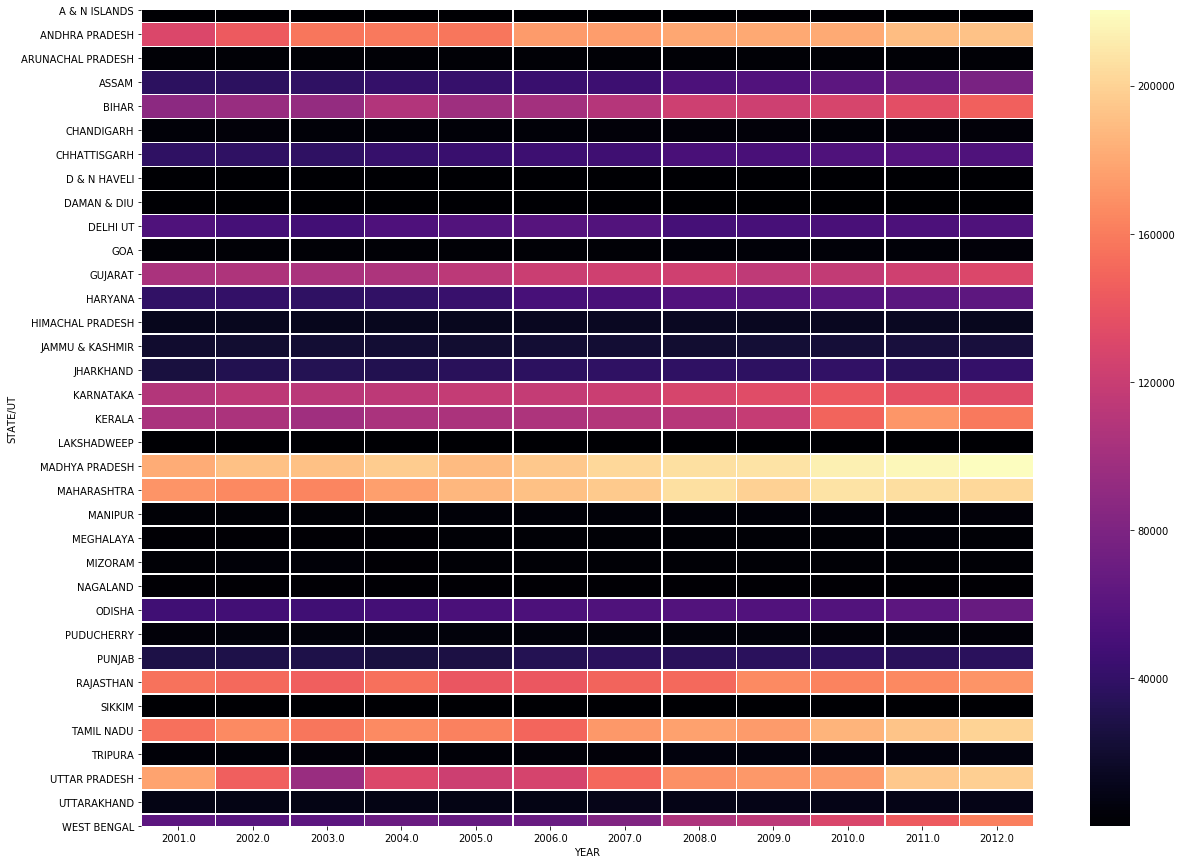

In [279]:
plt.pyplot.subplots(figsize=(20,15))
sns.heatmap(new,cmap='magma',linecolor='white',linewidths=0.5)